In [176]:
# importing libaries
import pandas as pd 
import numpy as np

#importing vizualization libaries 
import seaborn as sb 
import matplotlib.pyplot as plt 
from matplotlib import style

#importing preprocessing libaries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [34]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [36]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [39]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [40]:
df.columns 

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Exploratory data anlysis

In [41]:
df=df.drop('Unnamed: 0',axis=1)
import warnings
warnings.filterwarnings('ignore')


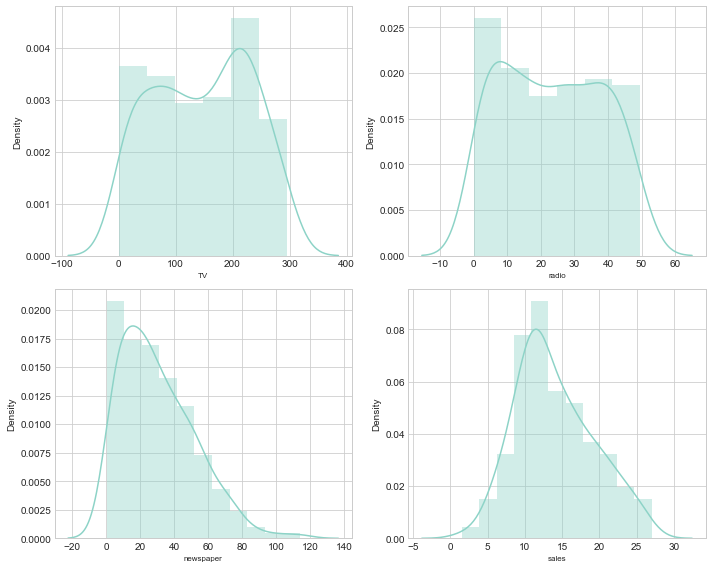

In [46]:
plt.figure(figsize=(10,8))
num=1

for columns in df:
    
    if num<=4:
        ax=plt.subplot(2,2,num)
        sb.distplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    num+=1
plt.tight_layout()

here the distplot shows that all the columns are allmost equally distributed except newspaper columns it is little skwead

# Cheaking the outliers

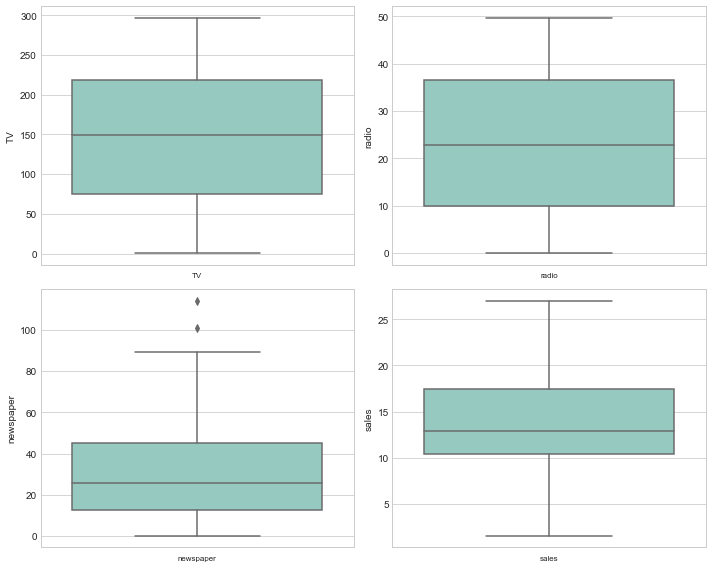

In [45]:
plt.figure(figsize=(10,8))

num=1

for columns in df:
    
    if num<=4:
        ax=plt.subplot(2,2,num)
        sb.boxplot(y=df[columns])
        plt.xlabel(columns,fontsize=8)
        
    num+=1
plt.tight_layout()

In [32]:
g=df['newspaper'].unique()
np.sort(g)


array([  0.3,   0.9,   1. ,   1.7,   1.8,   2.1,   2.2,   2.4,   3.2,
         3.6,   3.7,   4. ,   5. ,   5.3,   5.4,   5.5,   5.7,   5.8,
         5.9,   6. ,   6.4,   7.2,   7.4,   8.1,   8.3,   8.4,   8.5,
         8.7,   9. ,   9.2,   9.3,   9.4,   9.5,  10.2,  10.7,  10.9,
        11. ,  11.6,  11.9,  12.4,  12.6,  12.8,  12.9,  13.1,  13.8,
        14.2,  14.8,  15.6,  15.9,  16. ,  16.6,  17. ,  17.6,  17.9,
        18.2,  18.3,  18.4,  18.5,  19.1,  19.3,  19.4,  19.5,  19.6,
        20.3,  20.5,  20.6,  20.7,  21.2,  21.4,  21.6,  22. ,  22.3,
        22.9,  23.1,  23.2,  23.4,  23.5,  23.7,  24.2,  24.3,  25.6,
        25.9,  26.2,  26.4,  26.6,  27.2,  27.3,  27.4,  28.9,  29.7,
        30. ,  30.7,  31.3,  31.5,  31.6,  31.7,  32. ,  32.5,  33. ,
        33.8,  34.4,  34.5,  34.6,  35.1,  35.2,  35.6,  35.7,  36.8,
        36.9,  37. ,  37.7,  37.9,  38.6,  38.7,  38.9,  39.6,  40.8,
        41.4,  41.8,  43. ,  43.1,  43.2,  43.3,  44.3,  45.1,  45.2,
        45.7,  45.9,

here all data are perfectly good, only newspapaer has two outliers,by analysing it we find out

i am just going to simply remove the outliers manually, without using the any techinque

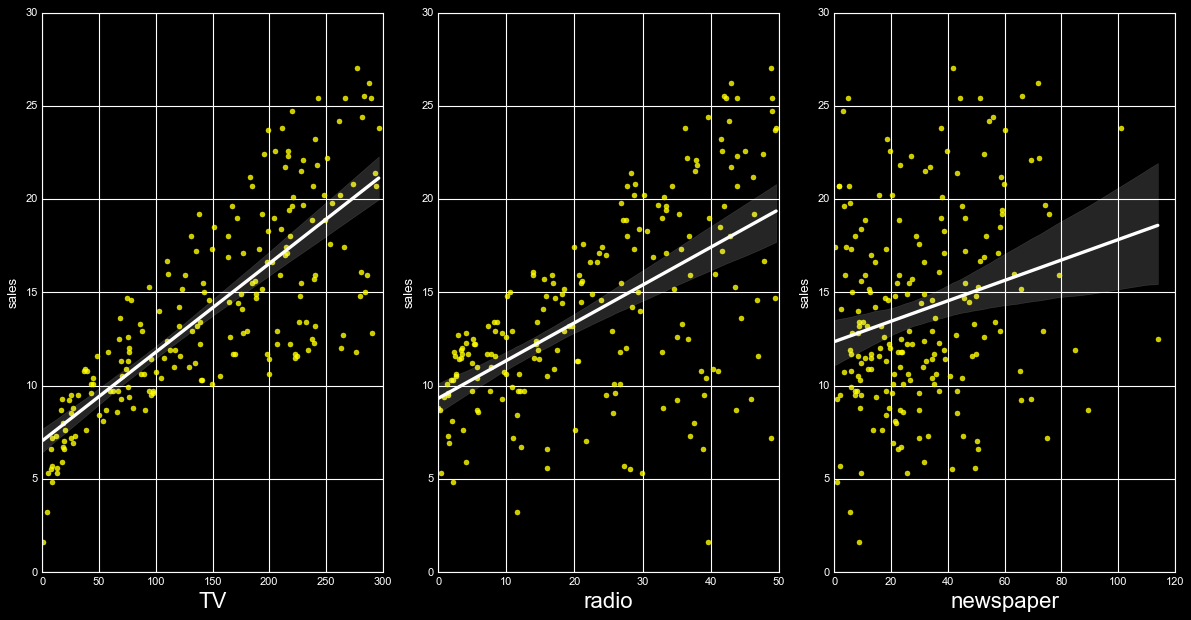

In [81]:

x=df.drop(columns='sales',axis=1)
y=df['sales']

plt.figure(figsize=(15,15),frameon=True)
plt.style.use("seaborn-whitegrid")
plt.style.use('dark_background')

num=1


for columns in x:
    
    if num<=6:
        ax=plt.subplot(2,3,num)
        sb.regplot(x[columns],y,scatter_kws={'color':'yellow'},line_kws={'color':'white'})
        plt.xlabel(columns,fontsize=20)
    num+=1
plt.tight_layout()

here we see the see  after the vizulization we see that the trend is here in columns tv and radio but not in newspaper 

In [56]:
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


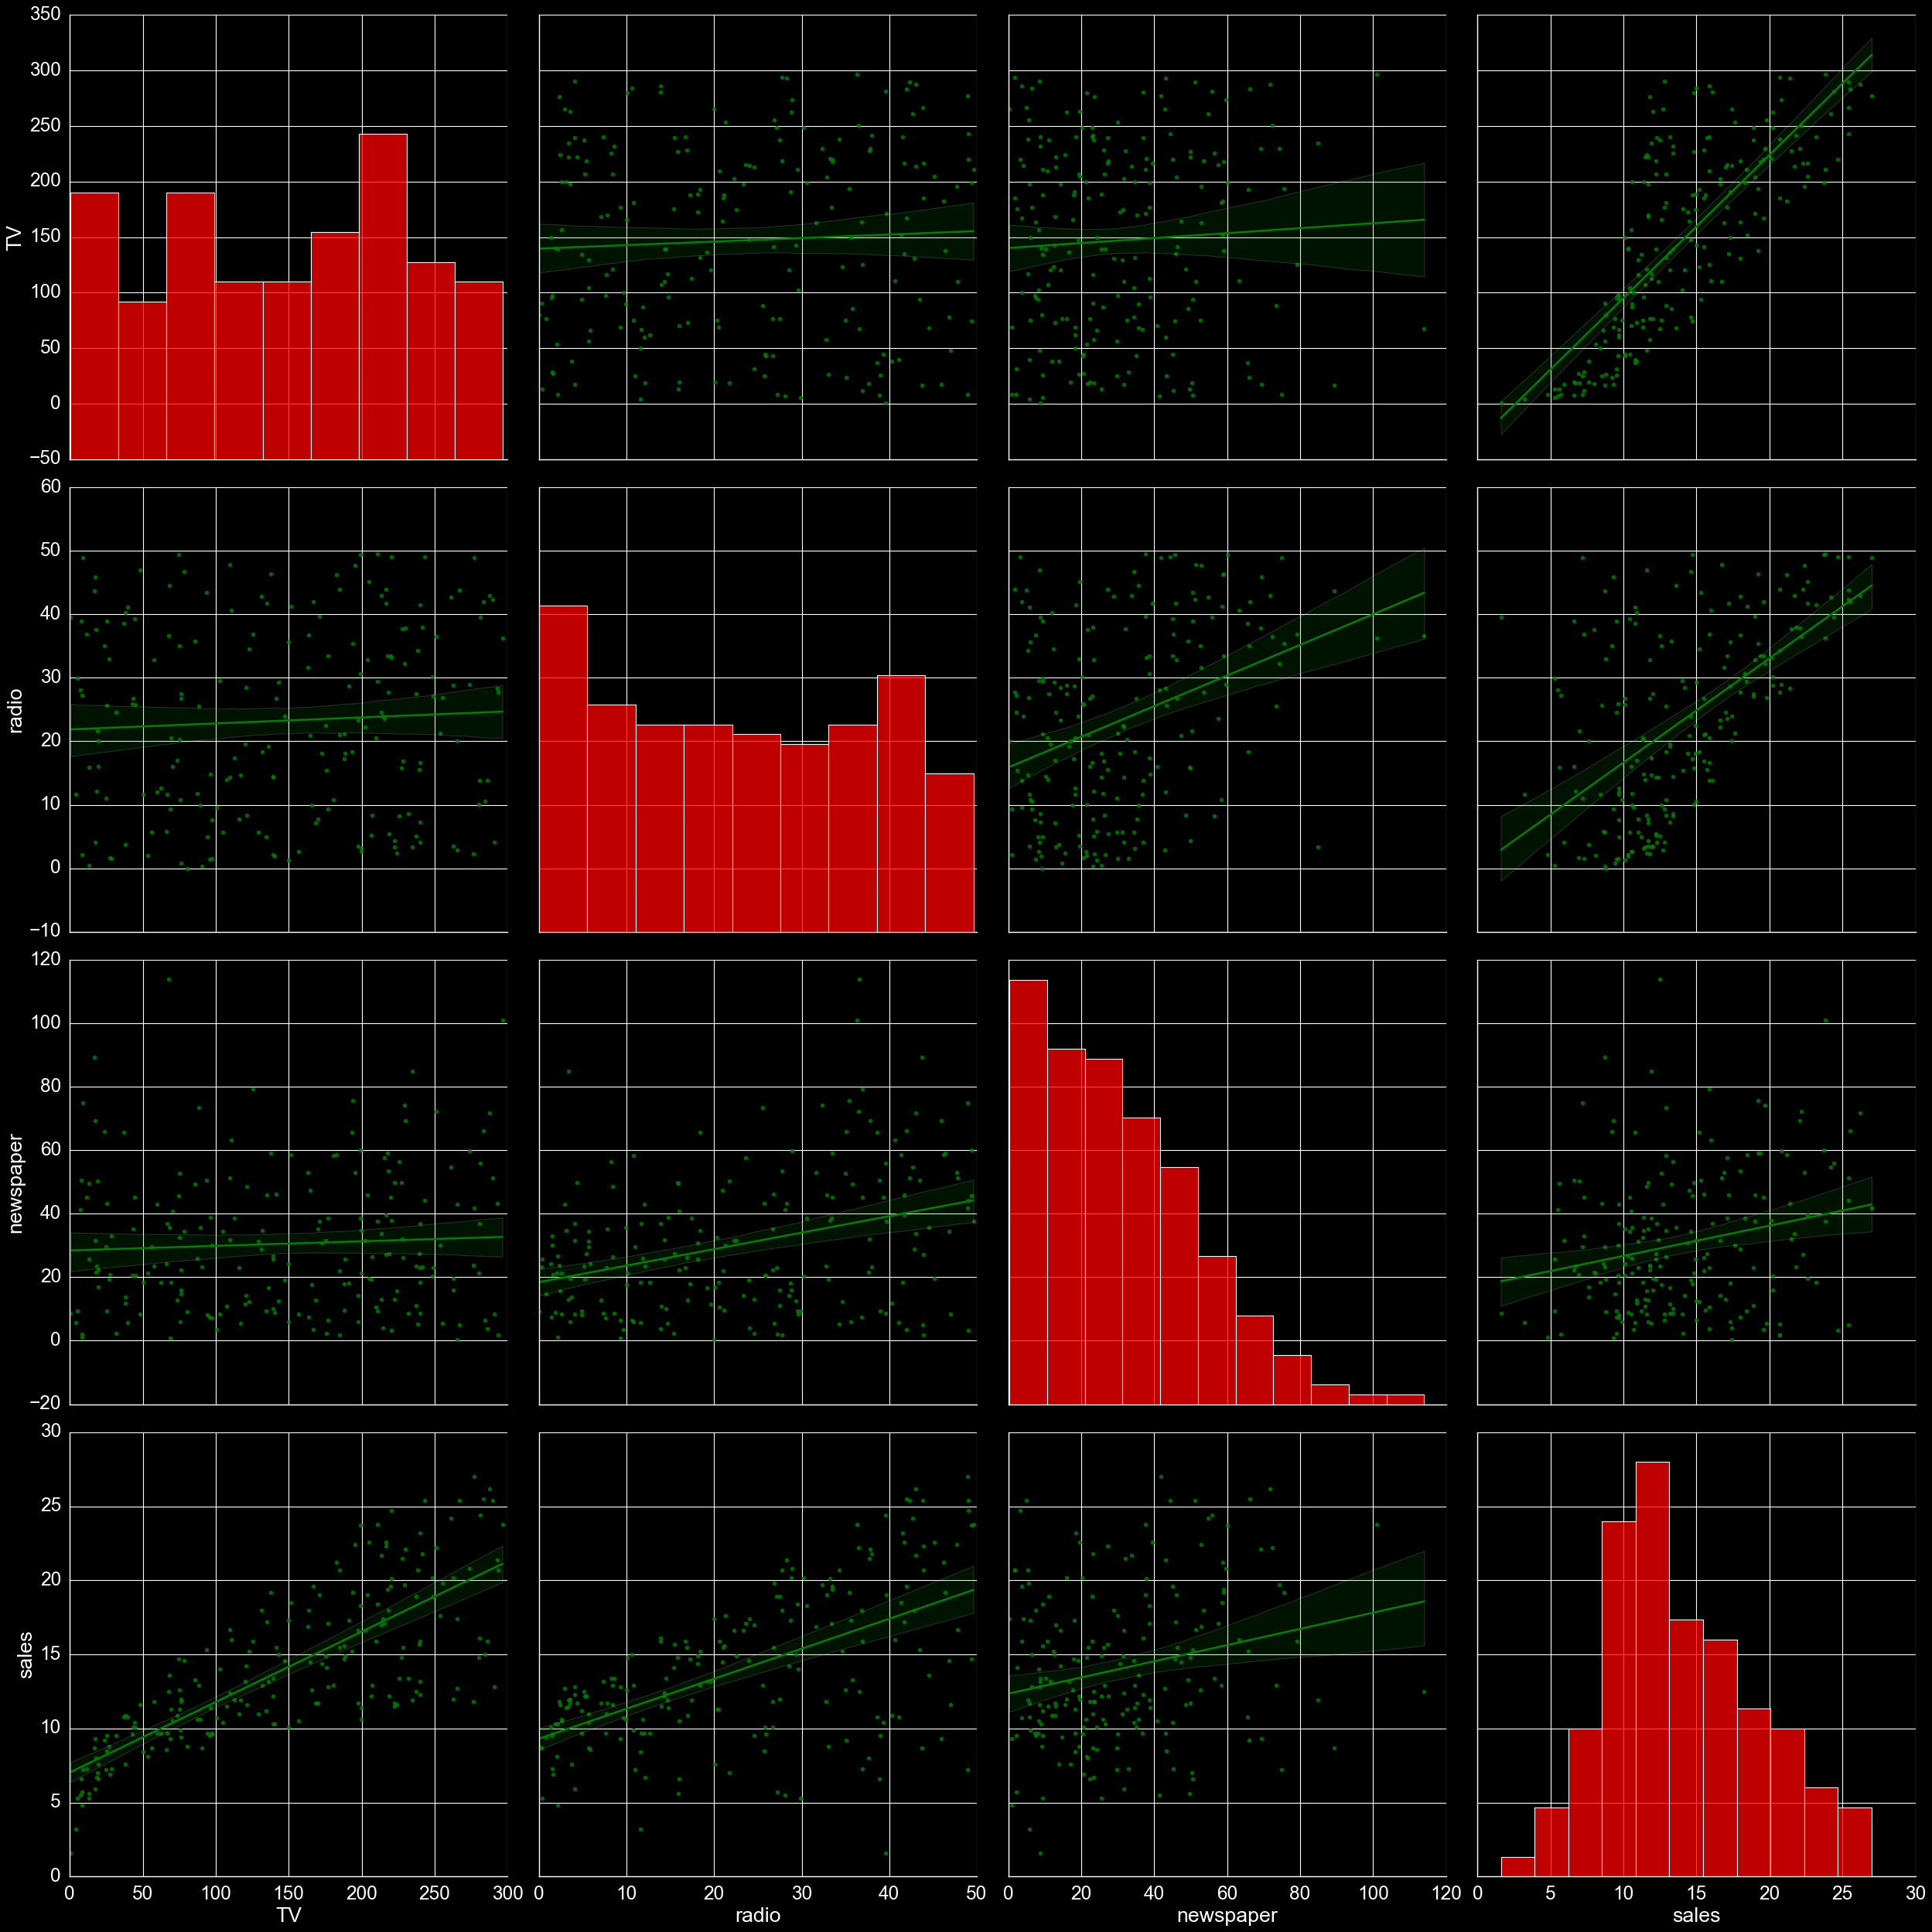

In [91]:

plt.style.use('dark_background')

sb.pairplot(kind='reg',data=df,plot_kws={'color':'green'},diag_kws={'color':'red'},size=8)
sb.set(font_scale=1)

# Correlation

In [92]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

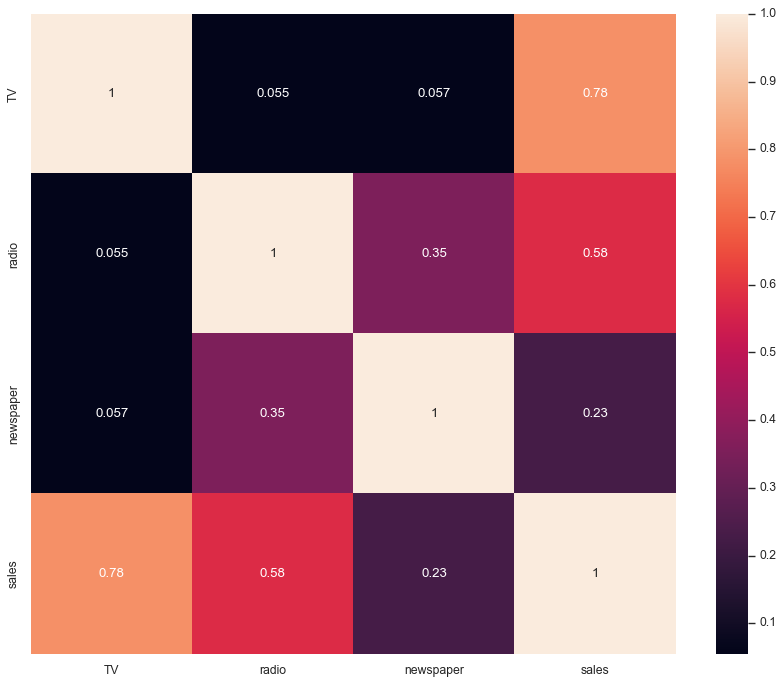

In [102]:
# for better vizulization we use heatmap
plt.figure(figsize=(13,10))
sb.heatmap(df.corr(),annot=True,annot_kws={'size':12})

here we see that

1.correlation between tv and sales is 0.78

2.correlation between the radio and sales is 0.58

3.correlation between the newspaper and sales is 0.23

these are the correlation of feature vs target


# removing outliers 

In [103]:
ser=pd.Series(df['newspaper'])
q1=ser.quantile(0.25)
q3=ser.quantile(0.75)
iqr=q3-q1

In [105]:
upside=q3+(1.5*iqr)
upside

93.625

In [111]:
df1=df[df['newspaper']<upside]

In [136]:
df1.reset_index()
df1.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

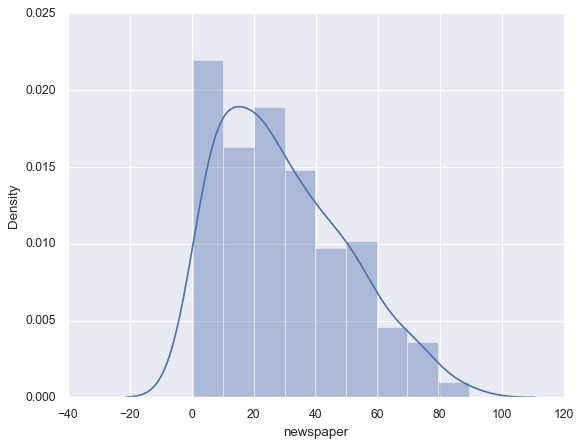

In [139]:
sb.distplot(df1['newspaper'])

now here we see that the skewness which is shown earlier should not be problem here

In [140]:
# now we start building the model

# Model building

In [153]:
from sklearn.linear_model import LinearRegression
x=df1.drop('sales',axis=1)
y=df1['sales']

In [181]:
maxr2=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    print('r2_score',acc,'randomstate',i,'\n')
    
    if acc>maxr2:
        maxr2=acc
        maxrs=i
        print('max_accuracy',maxr2,'maxrs',i)

r2_score 0.9169198405610238 randomstate 0 

max_accuracy 0.9169198405610238 maxrs 0
r2_score 0.901590819258015 randomstate 1 

r2_score 0.8428698015955046 randomstate 2 

r2_score 0.9149570033494691 randomstate 3 

r2_score 0.8621726482172964 randomstate 4 

r2_score 0.8657156665982401 randomstate 5 

r2_score 0.8929377262182756 randomstate 6 

r2_score 0.9025909419887761 randomstate 7 

r2_score 0.8650295916336709 randomstate 8 

r2_score 0.9188498439112271 randomstate 9 

max_accuracy 0.9188498439112271 maxrs 9
r2_score 0.7951173616742409 randomstate 10 

r2_score 0.9289103750473017 randomstate 11 

max_accuracy 0.9289103750473017 maxrs 11
r2_score 0.89973353302668 randomstate 12 

r2_score 0.8561689920266639 randomstate 13 

r2_score 0.9108282387120527 randomstate 14 

r2_score 0.8884316700228988 randomstate 15 

r2_score 0.8975078269869035 randomstate 16 

r2_score 0.9170206452931522 randomstate 17 

r2_score 0.8534437017901119 randomstate 18 

r2_score 0.8793796456452381 randomsta

r2_score 0.9233035017056923 randomstate 188 

r2_score 0.9036354400991088 randomstate 189 

r2_score 0.8601309367043719 randomstate 190 

r2_score 0.8566133287856563 randomstate 191 

r2_score 0.9063198700121936 randomstate 192 

r2_score 0.9049668942752206 randomstate 193 

r2_score 0.9214397967563263 randomstate 194 

r2_score 0.8507322940389361 randomstate 195 

r2_score 0.8652113617209841 randomstate 196 

r2_score 0.8677925419652637 randomstate 197 

r2_score 0.887959297450932 randomstate 198 

r2_score 0.8761517052091758 randomstate 199 



In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.25)

# LINEAR REGRESSION

In [185]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [187]:
predict_lr=lr.predict(x_test)

In [189]:
r2_score(y_test,predict_lr)

0.9450468735016785

# DECISION TREE

In [191]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()


In [193]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [196]:
predict_dtr=dtr.predict(x_test)
r2_score(y_test,predict_dtr)

0.9518966880043187

# K-NEAREST-NEIGHBOUR

In [200]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [202]:
predict_knn=knn.predict(x_test)

In [204]:
r2_score(y_test,predict_knn)

0.8986097214431024

# RANDOM FOREST 

In [206]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_train,y_train)

RandomForestRegressor()

In [208]:
predict_rd=rd.predict(x_test)

In [210]:
r2_score(y_test,predict_rd)

0.9756853201040294

# SUPPORT VECTOR MACHINE

In [326]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [327]:
predict_svr=svr.predict(x_test)

In [328]:
r2_score(y_test,predict_svr)

0.8173112745913066

# EXTRA TREE REGRESSOR

In [229]:
from sklearn.tree import ExtraTreeRegressor


In [239]:
etr=ExtraTreeRegressor()
etr.fit(x_train,y_train)

ExtraTreeRegressor()

In [241]:
etr_predict=etr.predict(x_test)

In [243]:
r2_score(y_test,etr_predict)

0.9489001377356405

# ADA BOOST 

In [246]:
from sklearn.ensemble import AdaBoostRegressor 
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)

AdaBoostRegressor()

In [248]:
adb_predict=adb.predict(x_test)

In [250]:
r2_score(y_test,adb_predict)

0.960126718215252

# GradientBoosting

In [254]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [256]:
gd_predict=gd.predict(x_test)

In [258]:
r2_score(y_test,gd_predict)

0.9744238627751136

# Xtream gradient boosting

In [263]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [266]:
xg_predict=xg.predict(x_test)
r2_score(y_test,xg_predict)

0.9772839287347667

# we are using the cross valadation techineque 

In [272]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [296]:
#linear regression
cvs_lr=cross_val_score(lr,x,y,scoring='r2',cv=8)
cvs.mean()

0.8880334554150218

In [306]:
#decision tree
csv_dt=cross_val_score(dtr,x,y,scoring='r2',cv=8)
csv_dt.mean()


0.9453639071808025

In [315]:
#k-nearest neighbor
csv_knn=cross_val_score(knn,x,y,scoring='r2',cv=8)
csv_knn.mean()


0.9225119245011225

In [377]:
#Random forest
csv_rd=cross_val_score(rd,x,y,scoring='r2',cv=8)

csv_rd.mean()

0.9781074147116335

In [349]:
#Support vector machine
svr_csv=cross_val_score(svr,x,y,scoring='r2',cv=8)
svr_csv.mean()

0.8503089549350342

In [354]:
#extra tree
etr_csv=cross_val_score(etr,x,y,scoring='r2',cv=8)
etr_csv.mean()

0.9484061100860512

In [359]:
#ada boost
adb_csv=cross_val_score(adb,x,y,scoring='r2',cv=8)
adb_csv.mean()

0.9529168155786057

In [366]:
#gradiant boosting
gd_csv=cross_val_score(gd,x,y,scoring='r2',cv=8)
gd_csv.mean()

0.9785736455115592

In [370]:
#xtream gradiant boosing 
xg_csv=cross_val_score(xg,x,y,scoring='r2',cv=8)
xg_csv.mean()

0.9727745411023466

for all the above we find that gradiant boosting is showing the best results, so we carried with gradient boosting 

# Hyperparameter tuning

In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters={'criterion':['friedman_mse', 'squared_error', 'mse'],
              'min_samples_split':range(2,10),
                    'max_leaf_nodes':range(2,4),
                       'max_depth':range(10,15)}

GradientBoostingRegressor()

GradientBoostingRegressor()

In [393]:
grid=GridSearchCV(GradientBoostingRegressor(),param_grid=parameters,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(2, 10)})

In [395]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_leaf_nodes': 3,
 'min_samples_split': 4}

In [401]:
grad=GradientBoostingRegressor(criterion ='squared_error',
 max_depth= 11,
 max_leaf_nodes= 3,
 min_samples_split= 4)

grad.fit(x_train,y_train)
grad_predict=grad.predict(x_test)

In [402]:
r2_score(y_test,grad_predict)

0.9794332102006225